In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns
import warnings 
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [14]:
# creating database connection
conn=sqlite3.connect('inventory.db')

#fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary1",conn)
df.head()

,VendorName,VendorNumber,Brand,Description,actualprice,Volume,PurchasePrice,totalpurchasequantity,totaldollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,Grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,BROWN-FORMAN CORP,1128,1233,Jack Daniels No 7 Black,36.99,1750.0,26.27,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,MARTIGNETTI COMPANIES,4425,3405,Tito's Handmade Vodka,28.99,1750.0,23.19,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,PERNOD RICARD USA,17035,8068,Absolut 80 Proof,24.99,1750.0,18.24,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,DIAGEO NORTH AMERICA INC,3960,4261,Capt Morgan Spiced Rum,22.99,1750.0,16.17,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,DIAGEO NORTH AMERICA INC,3960,3545,Ketel One Vodka,29.99,1750.0,21.89,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# Exploratory data analysis
- previously we examined the various tables in the database to identify key variables, undestand their relationships, and determine which ones should be included in the final analysis
- in the phase of EDA ,we will analyze the resultant table to gain the insights into the distribution of each column .This will help us understand data patterns,
indentify anomalies ,and ensure datra quality before proceeding with further analysis

In [18]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
actualprice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
totalpurchasequantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totaldollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


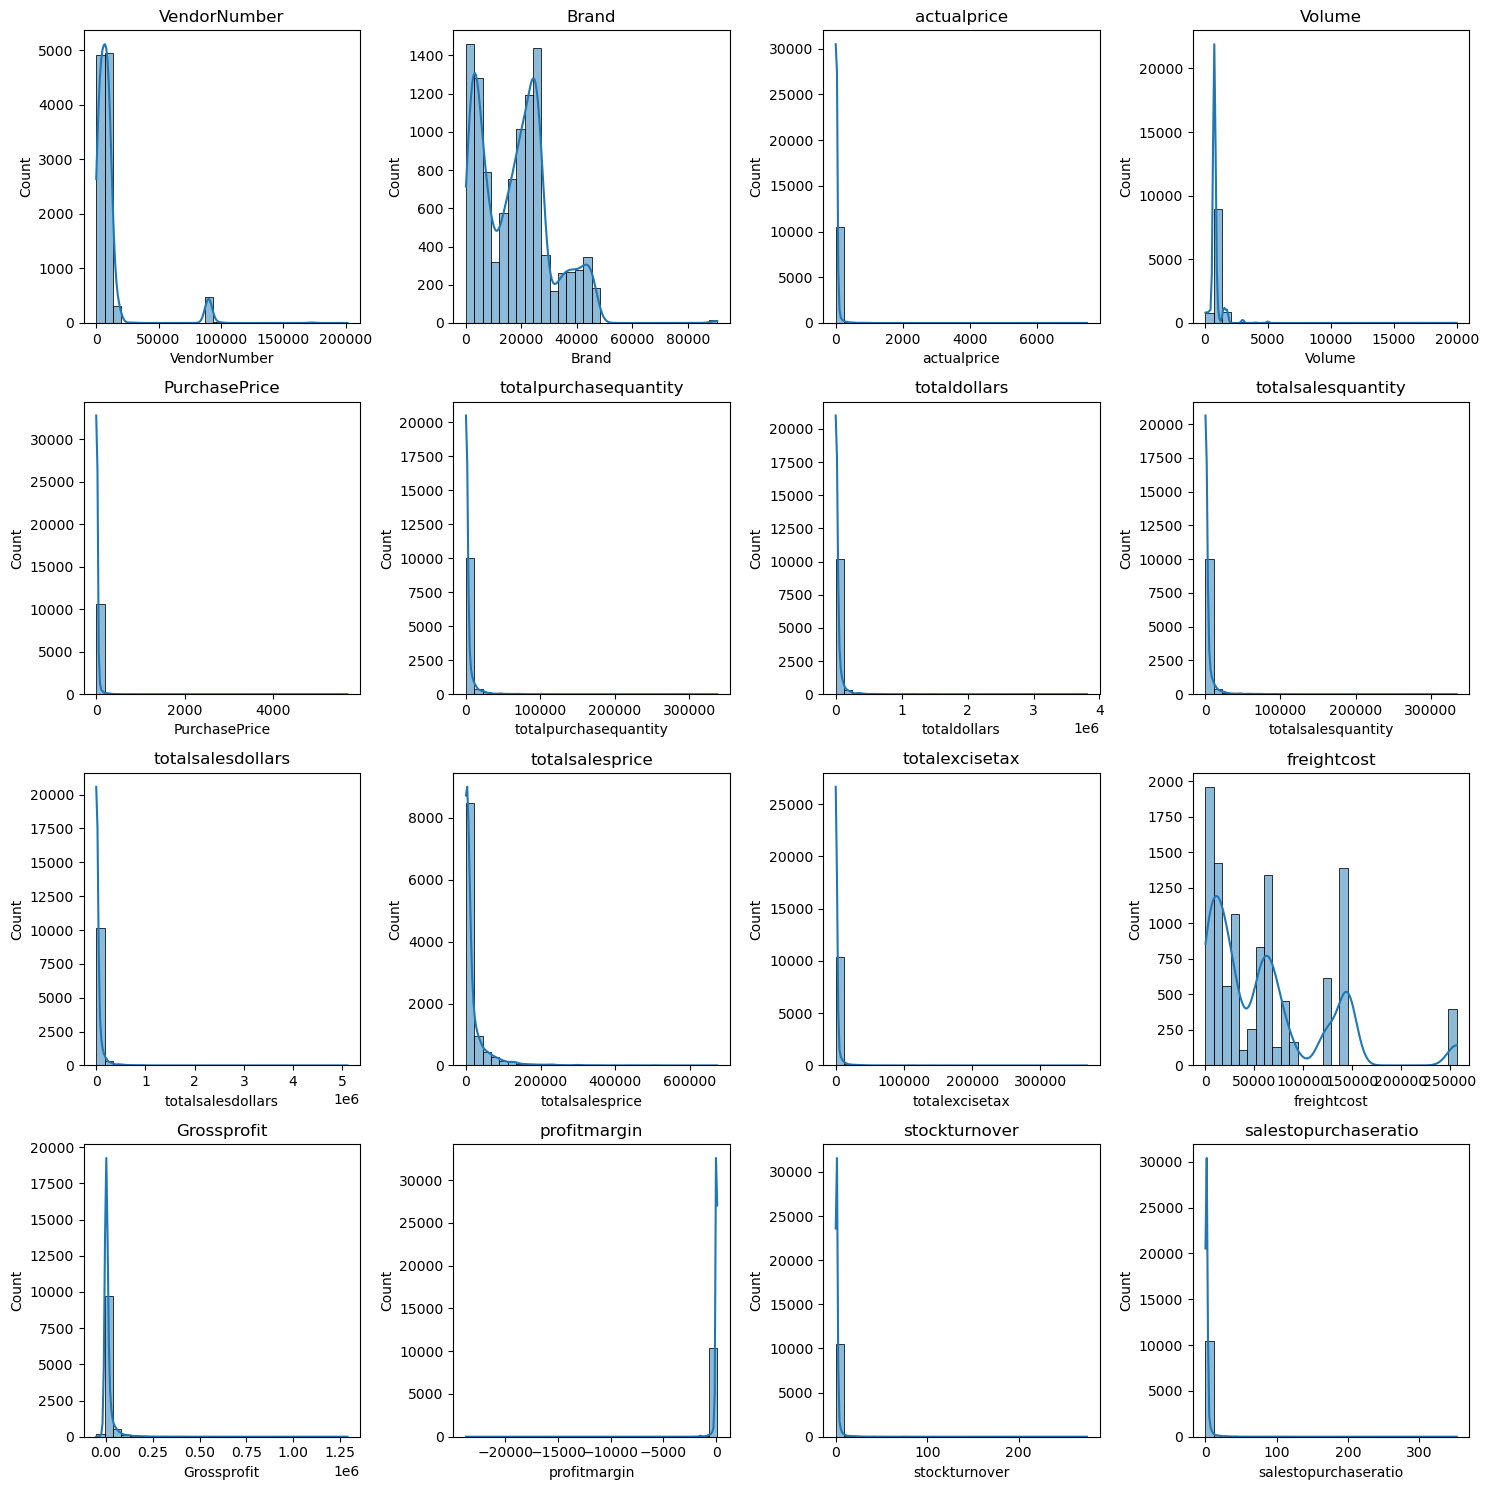

In [20]:
# distribution plots for numerical columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,15))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()
    

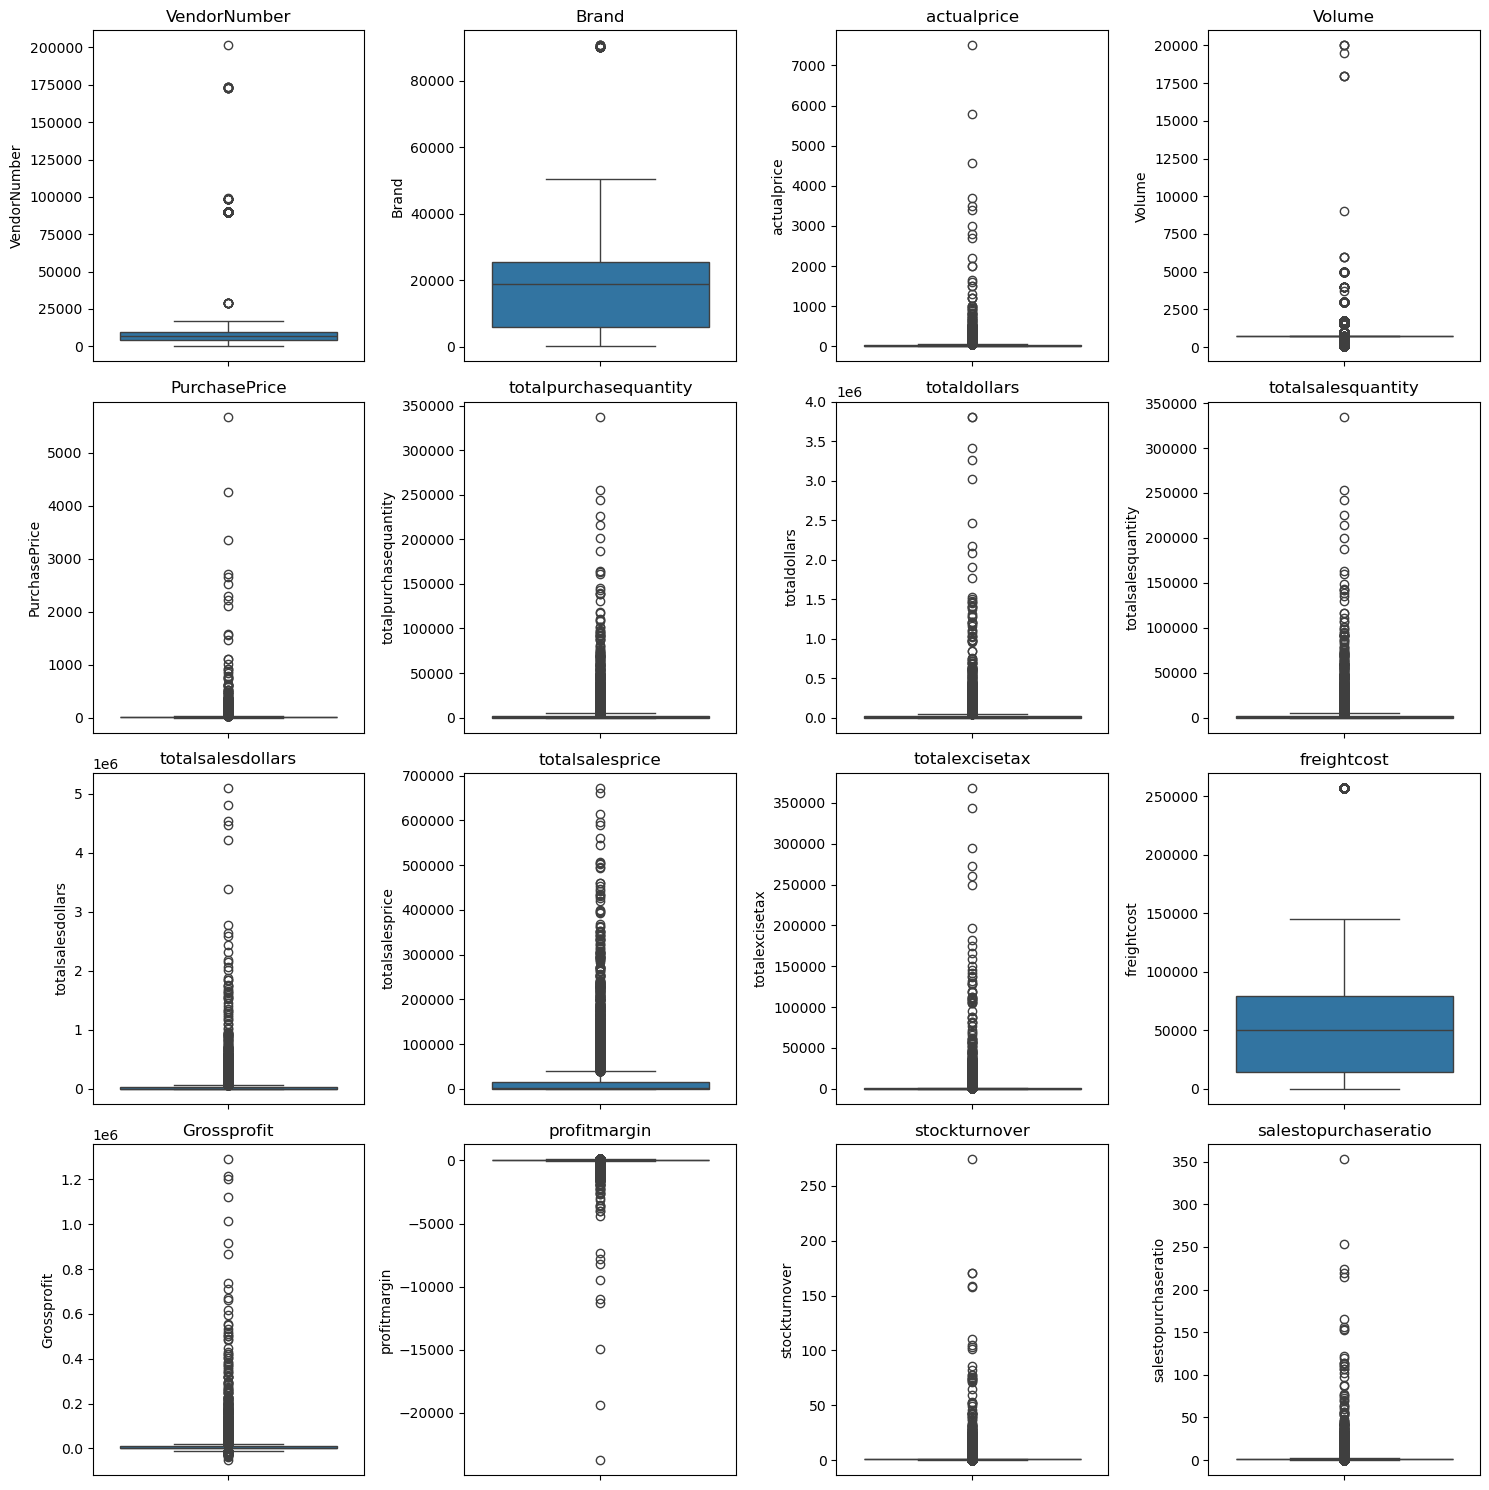

In [21]:
# outlier detection with boxplot
plt.figure(figsize=(15,15))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights
__Negative & zero values:__
- gross profit= minimum value is -52,000.78, indicating losses. some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
- profit margin= has a minimum of -infinty , which suggests cases where revenue is zero or even lower than costs.
- total sales quantity & sales dollars : minimum values are 0 , meaning some products were purchased but never sold. these could be slow - moving or obselete stock

__Outliers indicated by high Standard Deviations:__

- purchases & actual prices: the mass values (5681.81&7499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight cost: huge variation from 0.09 to 257,032.07,suggests logistics inefficiencies or bulk shipments.
- stock turnover-ranges from 0 to 274.5 , implying some products sell extremely fast while other remains in stock indefinetely . value more than q indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fullfilled from older stock
    


In [23]:
# lets filter the data by removing inconsistencies
df=pd.read_sql_query(""" select * 
from vendor_sales_summary1
where Grossprofit > 0
and profitmargin > 0
and totalsalesquantity > 0""",conn)

In [24]:
df

,VendorName,VendorNumber,Brand,Description,actualprice,Volume,PurchasePrice,totalpurchasequantity,totaldollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,Grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,BROWN-FORMAN CORP,1128,1233,Jack Daniels No 7 Black,36.99,1750.0,26.27,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,MARTIGNETTI COMPANIES,4425,3405,Tito's Handmade Vodka,28.99,1750.0,23.19,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,PERNOD RICARD USA,17035,8068,Absolut 80 Proof,24.99,1750.0,18.24,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,DIAGEO NORTH AMERICA INC,3960,4261,Capt Morgan Spiced Rum,22.99,1750.0,16.17,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,DIAGEO NORTH AMERICA INC,3960,3545,Ketel One Vodka,29.99,1750.0,21.89,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,WINE GROUP INC,9815,8527,Concannon Glen Ellen Wh Zin,4.99,750.0,1.32,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,SAZERAC CO INC,8004,5683,Dr McGillicuddy's Apple Pie,0.49,50.0,0.39,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,HEAVEN HILL DISTILLERIES,3924,9123,Deep Eddy Vodka,0.99,50.0,0.74,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,DIAGEO NORTH AMERICA INC,3960,6127,The Club Strawbry Margarita,1.99,200.0,1.47,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


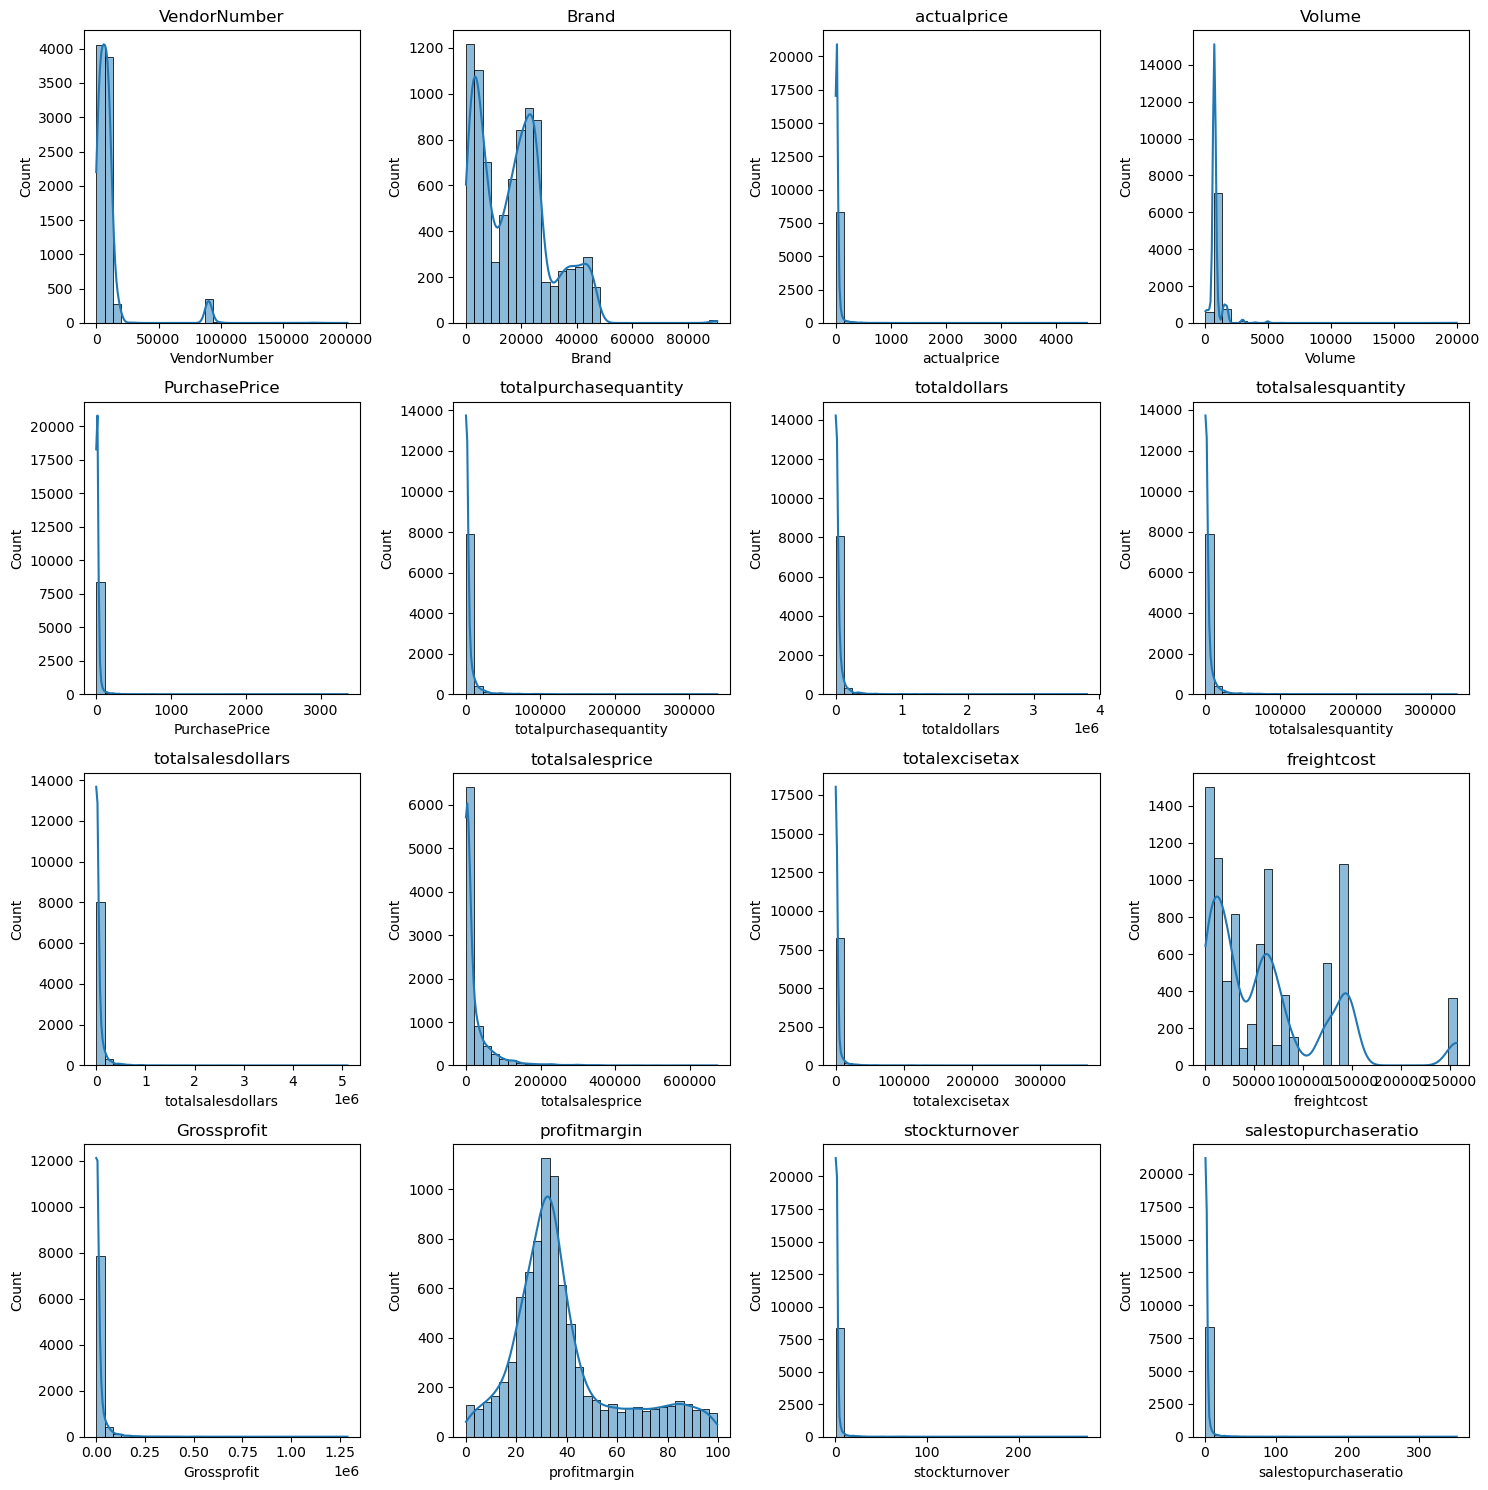

In [25]:
# distribution plots for numerical columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,15))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()
    

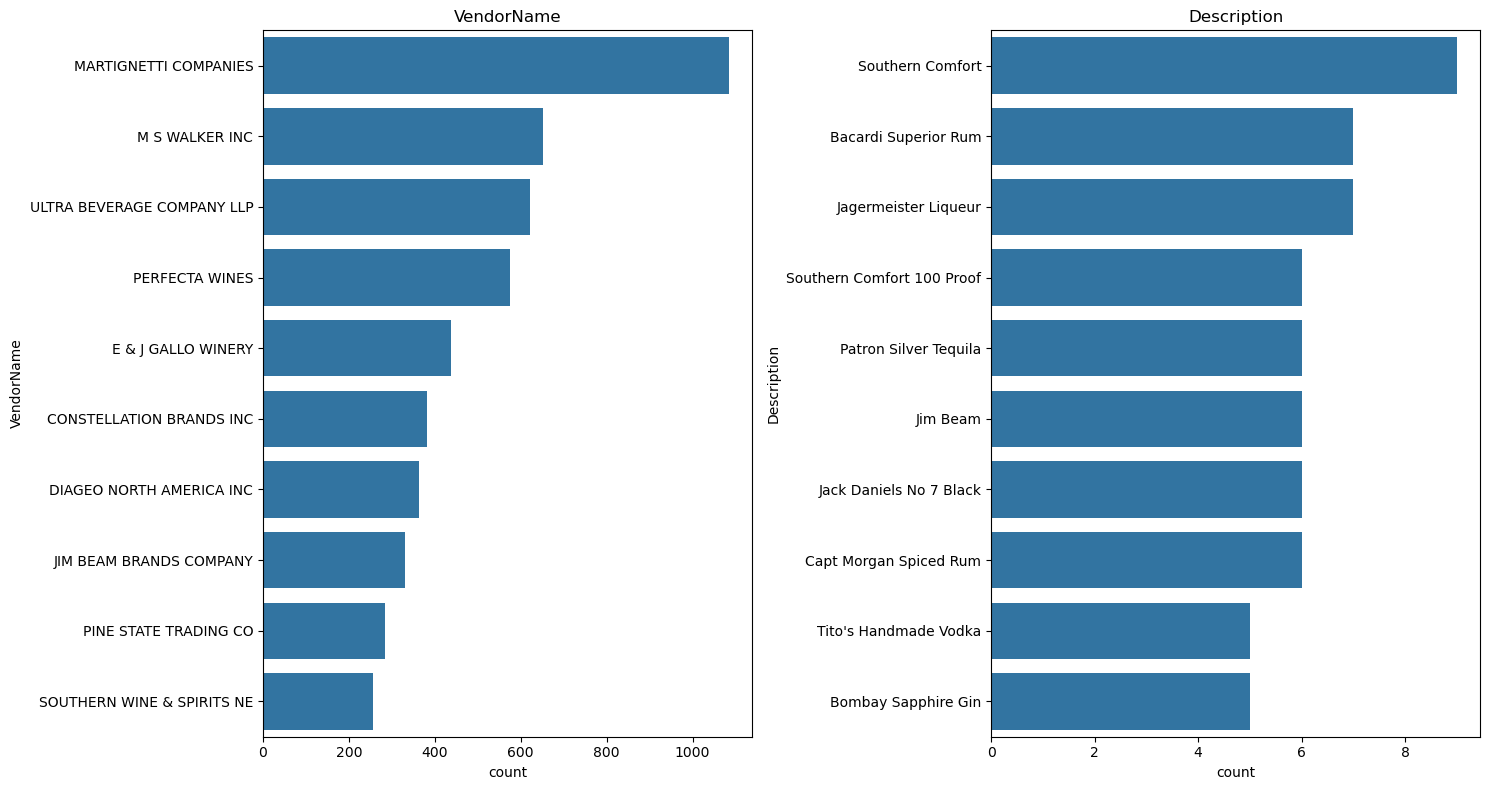

In [26]:
# count plots for categorical columns
categorical_cols= ["VendorName","Description"]
plt.figure(figsize=(15,8))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) # top10 categories
    plt.title(col)
plt.tight_layout()
plt.show()

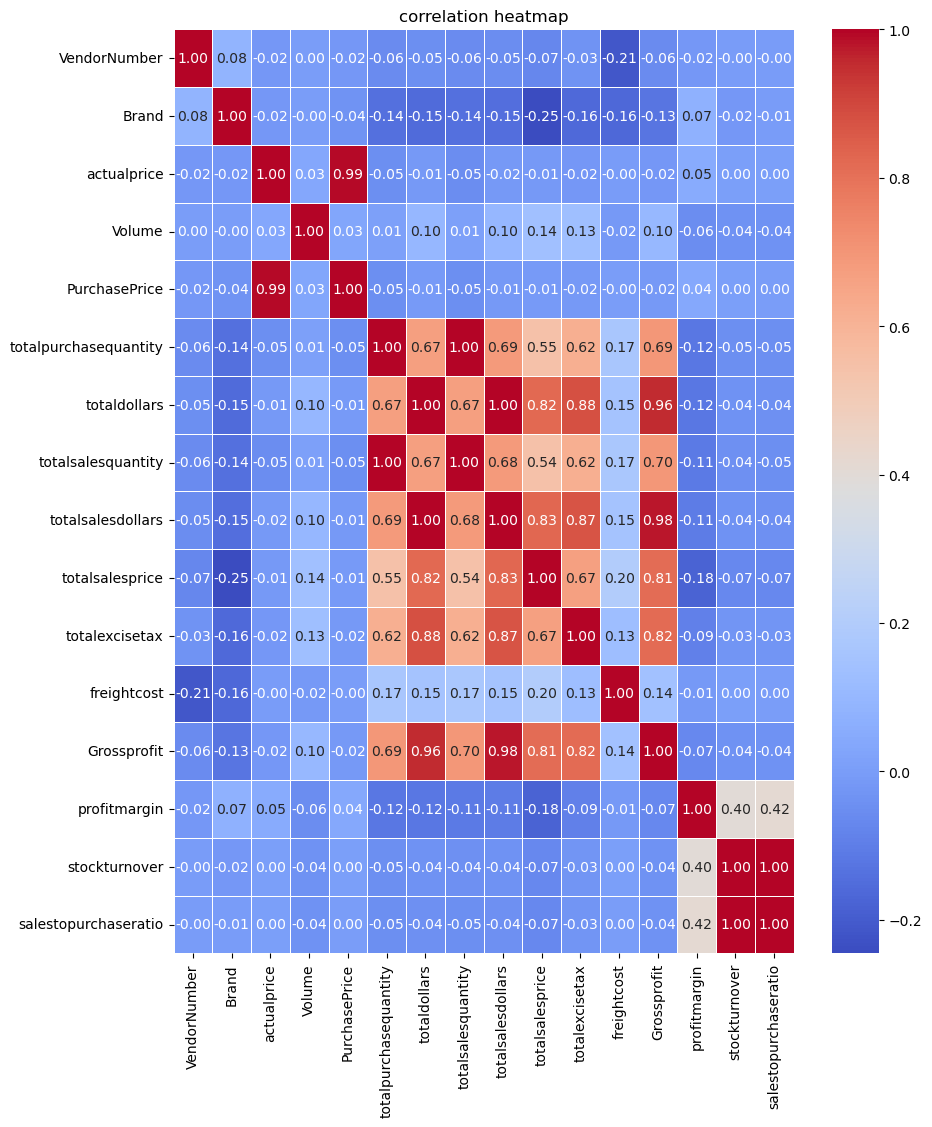

In [27]:
# correlation heatmap
plt.figure(figsize=(10,12))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.6)
plt.title("correlation heatmap")
plt.show()

# correlation insights
- purchaseprice has weak correlation with totalsaledollars ( -0.012) and grossprofit(-0.016), suggesting that price variations do not significantly impact sales revenue or profit
- strong correlation between total purchase quantity and total sales quantiy(0.999), confirming efficient inventory turnover.
- negative correlation between profit margin and totalsales price(-0.179) suggests that as sales price increases, margins decrease ,possibly due to competitive pricing pressures
- stockturnover has weak negative correlations with both grossprofit(-0.038) and profitmargin(-0.055), indicating that faster turnover does not necessarily result in higher profitability

# DATA ANALYSIS
- identify brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins

In [30]:
brand_performance=df.groupby('Description').agg({
    'totalsalesdollars':'sum',
    'profitmargin':'mean'}).reset_index()

In [31]:
brand_performance

,Description,totalsalesdollars,profitmargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [32]:
low_sales_threshold=brand_performance['totalsalesdollars'].quantile(0.15)
high_margin_threshold=brand_performance['profitmargin'].quantile(0.85)

In [33]:
low_sales_threshold

560.299

In [34]:
high_margin_threshold

64.97017552750113

In [35]:
# filter brands with low sales but higher profit margins
target_brands = brand_performance[
(brand_performance['totalsalesdollars']<=low_sales_threshold) &
(brand_performance['profitmargin']>=high_margin_threshold)
]
print("brands with low sales but high profit margin")
display(target_brands.sort_values('totalsalesdollars',ascending=False))

brands with low sales but high profit margin


,Description,totalsalesdollars,profitmargin
3326,Goulee Cos d'Estournel 10,558.87,69.434752
6245,Sbragia Home Ranch Merlot,549.75,66.444748
57,A Bichot Clos Marechaudes,539.94,67.740860
2271,Dad's Hat Rye Whiskey,538.89,81.851584
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
...,...,...,...
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
2188,Crown Royal Apple,27.86,89.806174
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2369,Debauchery Pnt Nr,11.58,65.975820


In [36]:
brand_performance=brand_performance[brand_performance['totalsalesdollars']<10000] # for better visualization

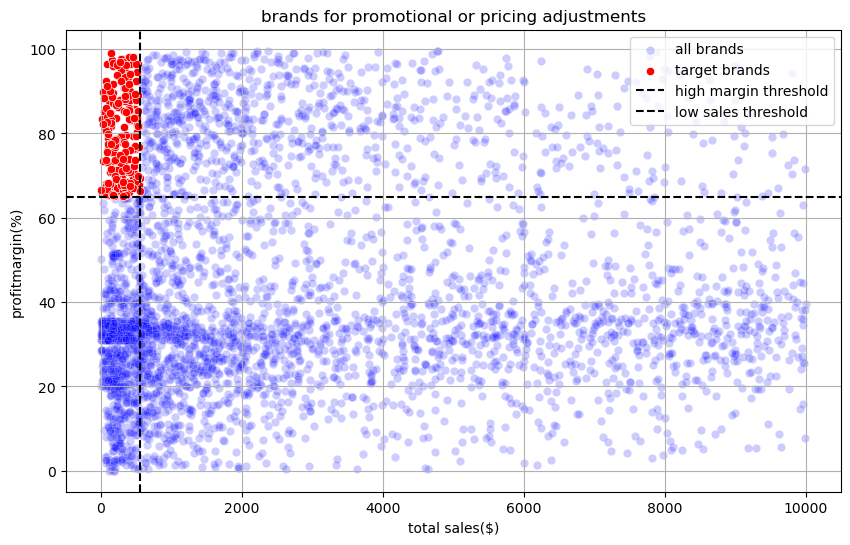

In [37]:
# scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='totalsalesdollars',y='profitmargin',color='blue',label="all brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='totalsalesdollars',y='profitmargin',color='red',label="target brands")

plt.axhline(high_margin_threshold,linestyle='--',color='black',label='high margin threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='black',label='low sales threshold')

plt.xlabel('total sales($)')
plt.ylabel('profitmargin(%)')
plt.title("brands for promotional or pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()

which vendors and brands demonstrate the highest salesperformance

In [39]:
def format_dollars(value):
    if value >= 1_00_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}k"
    else:
        return str(value)

In [40]:
# top vendors and brands by sales performance
top_vendor=df.groupby("VendorName")['totalsalesdollars'].sum().nlargest(10)
top_brand=df.groupby("Description")['totalsalesdollars'].sum().nlargest(10)
top_vendor


VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: totalsalesdollars, dtype: float64

In [41]:
top_brand

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totalsalesdollars, dtype: float64

In [42]:
top_brand.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdollars, dtype: object

In [43]:
top_vendor.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: totalsalesdollars, dtype: object

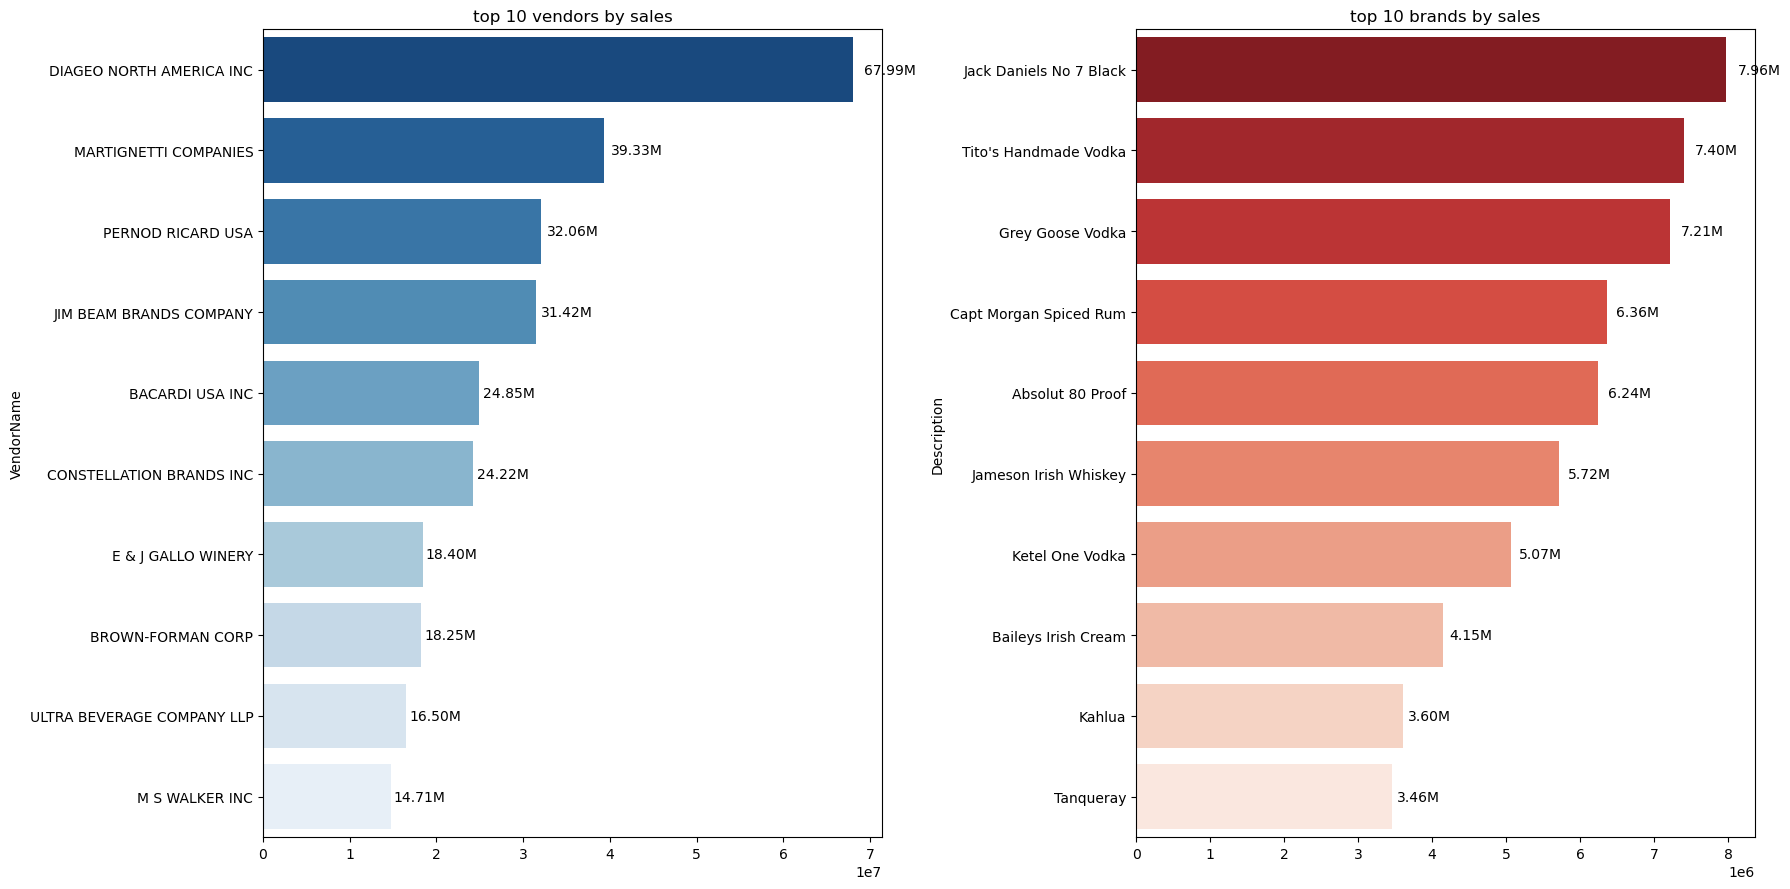

In [44]:
plt.figure(figsize=(18,9))
# plot for top vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendor.index,x=top_vendor.values,palette="Blues_r")
plt.title("top 10 vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha="left",va='center',fontsize=10,color='black')
#plot for top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brand.index.astype(str),x=top_brand.values,palette="Reds_r")
plt.title("top 10 brands by sales")
                
for bar in ax2.patches:
    ax2.text(bar.get_width() +  (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha="left",va="center",fontsize=10, color='black')

plt.tight_layout()
plt.show()




which vendors contribute the most to total purchase dollars

In [46]:
vendor_performance= df.groupby('VendorName').agg({'totaldollars':'sum',
                                                  'Grossprofit':'sum',
                                                  'totalsalesdollars':'sum'}).reset_index()


In [47]:
vendor_performance['purchasecontribution%']=vendor_performance['totaldollars']/vendor_performance['totaldollars'].sum()

In [48]:
vendor_performance

,VendorName,totaldollars,Grossprofit,totalsalesdollars,purchasecontribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000001
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.000084
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.000038
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000003
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.000340
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.000139
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.000971
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,0.019121
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,0.016932


In [49]:
vendor_performance=round(vendor_performance.sort_values('purchasecontribution%',ascending=False),2)

In [50]:

vendor_performance['cumulative_contribution%']=(vendor_performance['totaldollars']/vendor_performance['totaldollars'].sum()*100).cumsum()

In [51]:
vendor_performance

,VendorName,totaldollars,Grossprofit,totalsalesdollars,purchasecontribution%,cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,0.16,16.300345
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,0.08,24.598069
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,0.08,32.358623
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,0.08,40.003064
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,0.06,45.674993
...,...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00,99.999913
107,UNCORKED,118.74,58.20,176.94,0.00,99.999952
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00,99.999977
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00,99.999994


In [52]:
# display top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['totalsalesdollars']=top_vendors['totalsalesdollars'].apply(format_dollars)
top_vendors['totaldollars']=top_vendors['totaldollars'].apply(format_dollars)
top_vendors['Grossprofit']=top_vendors['Grossprofit'].apply(format_dollars)
top_vendors['cumulative_contribution%']=top_vendors['cumulative_contribution%']
top_vendors

,VendorName,totaldollars,Grossprofit,totalsalesdollars,purchasecontribution%,cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16,16.300345
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08,24.598069
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08,32.358623
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08,40.003064
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06,45.674993
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05,50.644664
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04,54.952273
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04,58.879065
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04,62.512545
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03,65.689600


In [53]:
top_vendors['purchasecontribution%'] *= 100


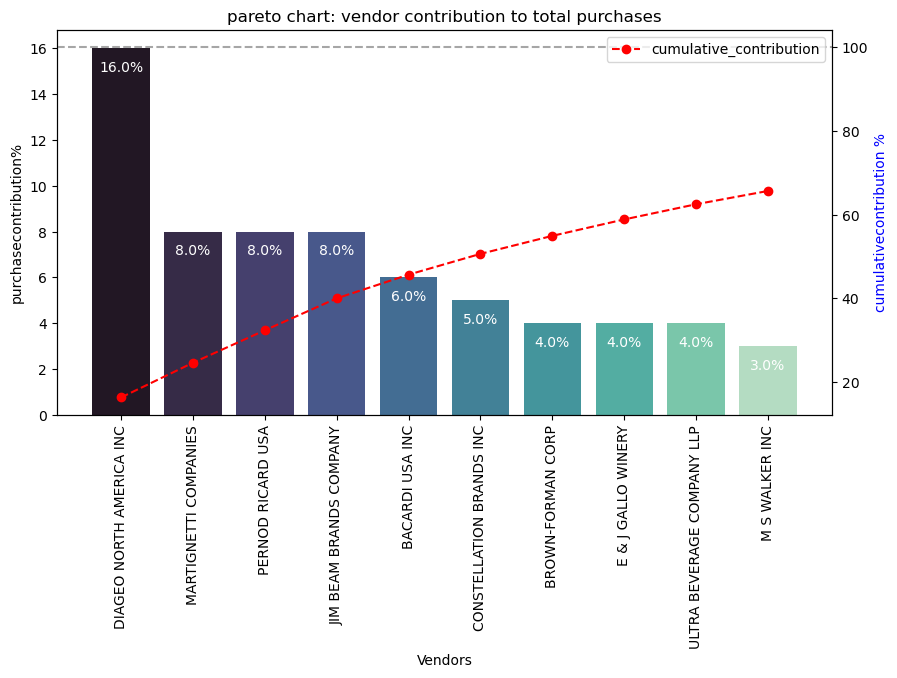

In [54]:
 fig , ax1= plt.subplots(figsize=(10,5))
# bar plot for purchase contribution
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['purchasecontribution%'],palette='mako',ax=ax1)
for i, value in enumerate(top_vendors['purchasecontribution%']):
    ax1.text(i, value - 1, f"{value:.1f}%", ha='center', fontsize=10, color='white')


# line plot for cummulative contribution
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['cumulative_contribution%'],color='red',marker='o',linestyle='dashed',label='cumulative_contribution')
ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax2.set_ylabel('cumulativecontribution %' ,color='blue')
ax1.set_xlabel('Vendors')
ax1.set_title('pareto chart: vendor contribution to total purchases')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


how much is total procurement is dependent on the top vendors?

In [56]:
print(f"total purchase contribution of top 10 vendors is {round(top_vendors['purchasecontribution%'].sum(),2)}%")

total purchase contribution of top 10 vendors is 66.0%


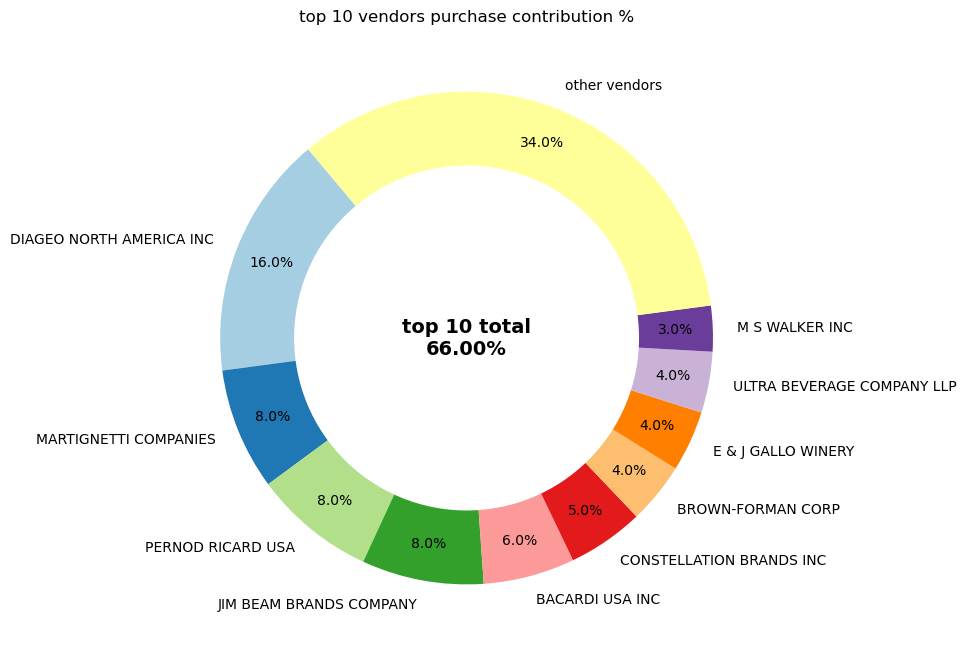

In [57]:
vendors=list(top_vendors['VendorName'].values)
purchase_contributions=list(top_vendors['purchasecontribution%'].values)
total_contribution=sum(purchase_contributions)
remaining_contribution=100-total_contribution

# append other vendors category

vendors.append("other vendors")
purchase_contributions.append(remaining_contribution)

# donut chart

fig, ax= plt.subplots(figsize=(10,8))
wedges,texts,autotexts=ax.pie(purchase_contributions,labels=vendors,autopct='%1.1f%%',
                              startangle=130,pctdistance=0.85,colors=plt.cm.Paired.colors)

# draw a white circle in the center
centercircle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centercircle)

# add total contribution annotation in the center
plt.text(0,0,f"top 10 total\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("top 10 vendors purchase contribution %")
plt.show()




does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [59]:
df.head(1)

,VendorName,VendorNumber,Brand,Description,actualprice,Volume,PurchasePrice,totalpurchasequantity,totaldollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,Grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,BROWN-FORMAN CORP,1128,1233,Jack Daniels No 7 Black,36.99,1750.0,26.27,145080,3811251.6,142049.0,5101919.51,672819.31,260999.2,68601.68,1290667.91,25.297693,0.979108,1.338647


In [60]:
df['unitpurchaseprice']=df['totaldollars']/df['totalpurchasequantity']

In [61]:
df.head()

,VendorName,VendorNumber,Brand,Description,actualprice,Volume,PurchasePrice,totalpurchasequantity,totaldollars,totalsalesquantity,totalsalesdollars,totalsalesprice,totalexcisetax,freightcost,Grossprofit,profitmargin,stockturnover,salestopurchaseratio,unitpurchaseprice
0,BROWN-FORMAN CORP,1128,1233,Jack Daniels No 7 Black,36.99,1750.0,26.27,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,MARTIGNETTI COMPANIES,4425,3405,Tito's Handmade Vodka,28.99,1750.0,23.19,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,PERNOD RICARD USA,17035,8068,Absolut 80 Proof,24.99,1750.0,18.24,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,DIAGEO NORTH AMERICA INC,3960,4261,Capt Morgan Spiced Rum,22.99,1750.0,16.17,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,DIAGEO NORTH AMERICA INC,3960,3545,Ketel One Vodka,29.99,1750.0,21.89,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89


In [62]:
df['ordersize']=pd.qcut(df['totalpurchasequantity'],q=3,labels=['small','medium','large'])

In [63]:
df.groupby('ordersize')['unitpurchaseprice'].mean()

ordersize
small     39.068186
medium    15.486414
large     10.777625
Name: unitpurchaseprice, dtype: float64

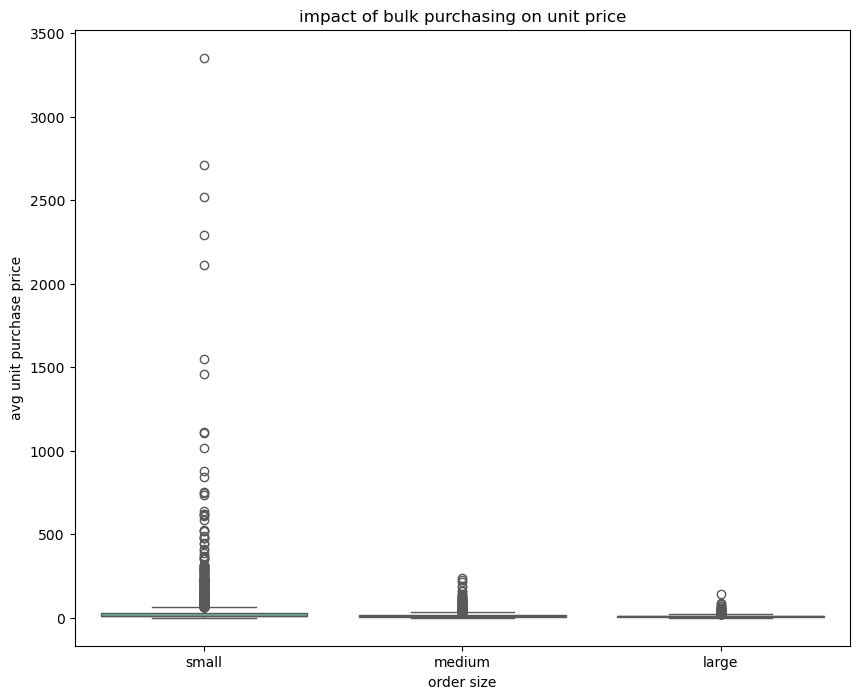

In [64]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,y='unitpurchaseprice',x='ordersize',palette='Set2')
plt.title('impact of bulk purchasing on unit price')
plt.xlabel('order size')
plt.ylabel('avg unit purchase price')
plt.show()

- vendors buying in bulk (large order size) get the lowest unit price (10.78 per unit),meanning higher margins if they can manage inventory efficiently
- the price differemce between small and large order is substantial ( -72% reduction is unit cost)
- this suggests that bulk pricing strategies succesfully vendors to purchase in larger volumes , leading to higher overall sales despite lower per unit revenue

which vendors have lower inventory turnover, indicating excess stock and slow moving products

In [67]:
 df[df['stockturnover']<1].groupby('VendorName')[['stockturnover']].mean().sort_values('stockturnover',ascending=True)

,stockturnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
...,...
DISARONNO INTERNATIONAL LLC,0.975577
"PREMIUM PORT WINES, INC.",0.976077
TY KU LLC,0.976982


how much capital is locked in unsold inventory per vendor and  which vendors contribute the most of it?

In [69]:
df['unsoldinventoryvalue']=(df['totalpurchasequantity']-df['totalsalesquantity'])*df['PurchasePrice']
print("total unsold capital",format_dollars(df['unsoldinventoryvalue'].sum()))

total unsold capital 2.71M


In [71]:
# aggregate capital locked pervendor
inventoryvaluepervendor=df.groupby('VendorName')['unsoldinventoryvalue'].sum().reset_index()
# sort values with the highest locked capital
inventoryvaluepervendor=inventoryvaluepervendor.sort_values('unsoldinventoryvalue',ascending=False)
inventoryvaluepervendor['unsoldinventoryvalue']=inventoryvaluepervendor['unsoldinventoryvalue'].apply(format_dollars)
inventoryvaluepervendor.head(10)

,VendorName,unsoldinventoryvalue
25,DIAGEO NORTH AMERICA INC,0.72M
46,JIM BEAM BRANDS COMPANY,0.55M
68,PERNOD RICARD USA,0.47M
116,WILLIAM GRANT & SONS INC,0.40M
30,E & J GALLO WINERY,0.23M
79,SAZERAC CO INC,0.20M
11,BROWN-FORMAN CORP,0.18M
20,CONSTELLATION BRANDS INC,0.13M
61,MOET HENNESSY USA INC,0.13M
77,REMY COINTREAU USA INC,0.12M


what is the 95 percent confidence interval for profit margins of top performing and lowe performing vendors

In [73]:
top_threshold=df['totalsalesdollars'].quantile(0.75)
low_threshold=df['totalsalesdollars'].quantile(0.25)


In [74]:
top_vendors=df[df['totalsalesdollars']>=top_threshold]['profitmargin'].dropna()
low_vendors=df[df['totalsalesdollars']>=low_threshold]['profitmargin'].dropna()


In [75]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: profitmargin, Length: 2141, dtype: float64

In [76]:
def confidenceinterval(data, confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data)) # standard error
    t_critical = stats.t.ppf((1+ confidence)/2,df=len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val,mean_val-margin_of_error,mean_val + margin_of_error

top vendors 95% c1:(30.74,31.61),Mean: 31.18
low vendors 95% c1:(37.29,38.26),Mean: 37.77


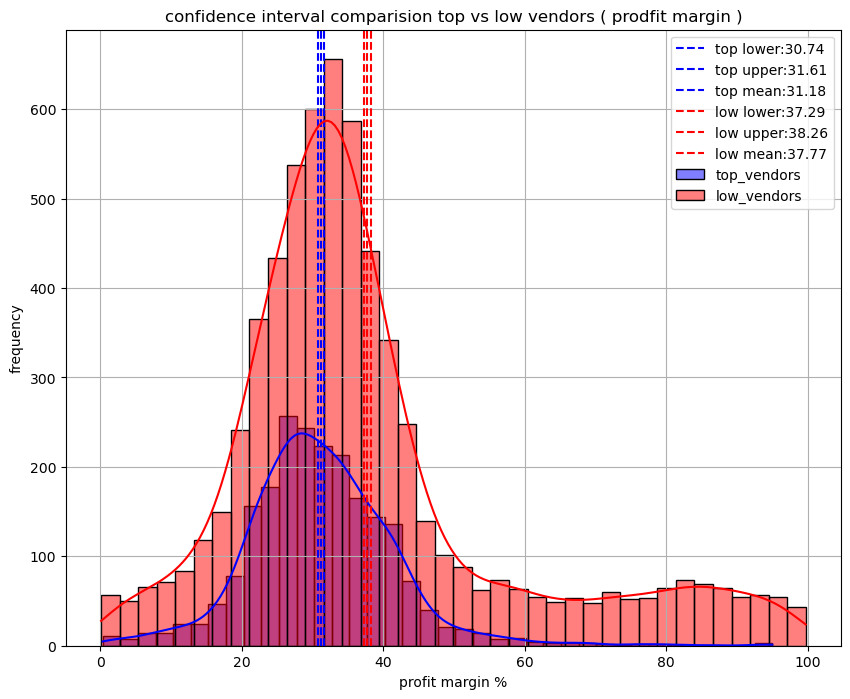

In [77]:
top_mean,top_lower,top_upper=confidenceinterval(top_vendors)
low_mean,low_lower,low_upper=confidenceinterval(low_vendors)
print(f"top vendors 95% c1:({top_lower:.2f},{top_upper:.2f}),Mean: {top_mean:.2f}")
print(f"low vendors 95% c1:({low_lower:.2f},{low_upper:.2f}),Mean: {low_mean:.2f}")

plt.figure(figsize=(10,8))
# top vendors plat
sns.histplot(top_vendors,kde=True,color="Blue",bins=38,alpha=0.5,label="top_vendors")
plt.axvline(top_lower,color="blue",linestyle="--",label=f"top lower:{top_lower:.2f}")
plt.axvline(top_upper,color="blue",linestyle="--",label=f"top upper:{top_upper:.2f}")
plt.axvline(top_mean,color="blue",linestyle="--",label=f"top mean:{top_mean:.2f}")

# low vendors plot

sns.histplot(low_vendors,kde=True,color="red",bins=38,alpha=0.5,label="low_vendors")
plt.axvline(low_lower,color="red",linestyle="--",label=f"low lower:{low_lower:.2f}")
plt.axvline(low_upper,color="red",linestyle="--",label=f"low upper:{low_upper:.2f}")
plt.axvline(low_mean,color="red",linestyle="--",label=f"low mean:{low_mean:.2f}")

#finaliswe plot
plt.title("confidence interval comparision top vs low vendors ( prodfit margin )")
plt.xlabel("profit margin %")
plt.ylabel("frequency")
plt.legend()
plt.grid(True)
plt.show()


- the confidence interval for low performing vendors ( 37.29% to 38.26%) is significantly higher than that of top performing vendor (30.74% to 31.61%)
- this suggests that vendor with lower sales tend to maintain higher profit margin ,potentiallydue to premium pricing or lowest operational costs.
- for high performing vendors. if they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bunding strategies.
- for low-performing vendors: despite higher margins their low sales volume might indicate a need for better marketing, competitive pricing or improved distribution strategies
                                                      

__is there a significant difference in profit margins between top-vendoring and low performing vendors?__

hypothesis:

- h0 (null hypothesisi) : there is no significant difference in the mean profit margins of top -performing and low - performing vendors
- h1 ( alternative hypothesis) the mean profit margins of top performing vendors are significantly different

In [80]:
top_threshold=df['totalsalesdollars'].quantile(0.75)
low_threshold=df['totalsalesdollars'].quantile(0.25)

top_vendors=df[df['totalsalesdollars']>=top_threshold]['profitmargin'].dropna()
low_vendors=df[df['totalsalesdollars']>=low_threshold]['profitmargin'].dropna()

# perform two sample t test
t_stat , p_value = ttest_ind(top_vendors,low_vendors,equal_var=False)

# print results
print(f"t-statistic: {t_stat:.4f},p_value: {p_value:.4f}")
if p_value < 0.05:
    print("reject h0 : there is significant difference in profit margins between top and low performing vendors")
else:
    print( "fail to reject h0 : no significant difference in profit margin")
    

t-statistic: -19.8217,p_value: 0.0000
reject h0 : there is significant difference in profit margins between top and low performing vendors
